# Метод Ньютона
## Дифференциальное уравнение
Изгиб балки длиной $L$
$$EI\phi''(l) = - Q(l)cos(\phi(l))$$
$l$ - длина  
$E$ - модуль Юнга  
$I$ - статический момент сечения  
$$ Q(l) = (L - l)q $$  
$Q$ - распределеная сила  

В задаче $E, I, q = const$

## Граничные условия
$$\phi(0) = 0$$
$$\phi'(L) = 0$$

## Применение метода конечных разностей
$$EI\frac{\phi_{i - 1} - 2\phi_i + \phi_{i + 1}}{h^2} = - Q(l_i)cos(\phi_i)$$
Перенесем на левую часть и поделим на $EI$
$$\frac{\phi_{i - 1} - 2\phi_i + \phi_{i + 1}}{h^2} + \frac{Q(l_i)}{EI} cos(\phi_i) = 0$$  

Определим невязку
$$ R_i = \frac{\phi_{i - 1} - 2\phi_i + \phi_{i + 1}}{h^2} + \frac{Q(l_i)}{EI} cos(\phi_i) = 0$$

**Найти решение задачи - минимизировать невязку в точках $R_i$**

## Применение метода Ньютона
$$\vec{F}(\vec{x}) = 0$$
$$\vec{x}_{i+1} = \vec{x}_i - \Big(\frac{\partial \vec{F}}{\partial \vec{x}}(\vec{x}_i)\Big)^{-1} \vec{F}(\vec{x}_i) $$
где $\frac{\partial \vec{F}}{\partial \vec{x}}$ - матрица Якоби  
Итерация метода состоит из решения системы уравнений
$$\Big( \frac{\partial \vec{F}}{\partial \vec{x}}(\vec{x}_i)\Big) z = \vec{F}(\vec{x}_i)$$
и обновления вектора решения
$$\vec{x}_{i+1} = \vec{x}_i - z$$

В применении к нашей системе
$$R_i (\phi_j) =0, \quad i,j = 0,...,N$$

$$\frac{\partial R_i}{\partial \phi_{i - 1}} = \frac{1}{h^2}$$
$$\frac{\partial R_i}{\partial \phi_i} = - \frac{2}{h^2} - \frac{Q(l_i)}{EI} sin(\phi_i)$$
$$\frac{\partial R_i}{\partial \phi_{i + 1}} = \frac{1}{h^2}$$

Остальные равны нулю

### Учет граничных условий
#### В точке закрепления
$$\phi_{0} = 0$$
$$ R_0 = \phi_0 - 0 = \phi_0$$
$$ \frac{\partial R_0}{\partial \phi_0} = 1$$
#### В свободной точке
$$\frac{\phi_{N} - \phi_{N - 1}}{h} = 0$$
$$R_N = \frac{\phi_{N} - \phi_{N - 1}}{h}$$
$$ \frac{\partial R_N}{\partial \phi_{N - 1}} = -\frac{1}{h}$$
$$ \frac{\partial R_N}{\partial \phi_N} = \frac{1}{h}$$

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# PHYSICS
EI = 0.05
L_max = 1
q = 1

In [3]:
# LOAD
def Q(l):
    return (L_max - l) * q

In [4]:
# NUMERICS
N = 100
l = np.linspace(0, L_max, N)
h = L_max / (N - 1)


In [5]:
# phi init
Phi = np.zeros(N)
Phi[0] = 0  # BC

In [6]:
# Newton settings
max_iter = 10
tol = 1e-6

In [7]:
"""
Вычисляет невязку R и Якобиан J для текущего приближения Phi
"""
def compute_R_and_J(Phi):   
    R = np.zeros(N)
    J = np.zeros((N, N))
    for i in range(0, N):
        # Закрепленный конец
        if i == 0:
            R[i] = Phi[0]
            
            J[i, i] = 1
        # Свободный конец
        elif i == N-1:
            R[i] = (Phi[i] - Phi[i - 1]) / h
            
            J[i, i-1] = -1 / h
            J[i, i] = 1 / h
        # промежуточные точки
        else:
            R[i] = (Phi[i-1] - 2 * Phi[i] + Phi[i+1]) / h**2 + (Q(l[i]) / EI) * np.cos(Phi[i])
            
            J[i, i - 1] = 1 / h**2
            J[i, i]     = -2 / h**2 - (Q(l[i]) / EI) * np.sin(Phi[i])
            J[i, i + 1] = 1 / h**2
    return R, J

Итерация 0, невязка = 19.7979797979798
Итерация 1, невязка = 22.74329988290002
Итерация 2, невязка = 14.432149491020223
Итерация 3, невязка = 70.95150844092386
Итерация 4, невязка = 124.70378363241488
Итерация 5, невязка = 8.109745399011116
Итерация 6, невязка = 0.1769719520550055
Итерация 7, невязка = 0.00012167489426673228
Итерация 8, невязка = 6.634870430843876e-11
Метод Ньютона сошелся


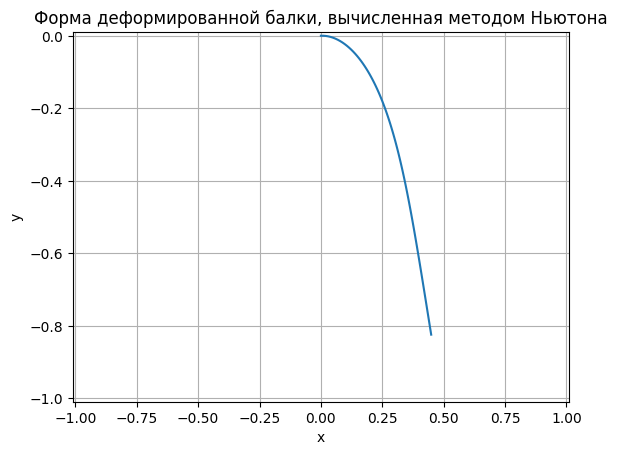

In [8]:
# Цикл
for iteration in range(max_iter):
    R, J = compute_R_and_J(Phi)
    
    R_norm = np.linalg.norm(R, np.inf)
    print(f"Итерация {iteration}, невязка = {R_norm}")
    if R_norm < tol:
        print("Метод Ньютона сошелся")
        break
    # Решаем систему линейных уравнений
    delta = np.linalg.solve(J, R)
    # Обновляем значения
    Phi[:] -= delta
    
else:
    print("Метод Ньютона не сошелся за заданное число итераций")

# Вычисляем координаты x и y

x = np.zeros(N)
y = np.zeros(N)
for i in range(N - 1):
    x[i+1] = x[i] + h * np.cos(Phi[i])
    y[i+1] = y[i] - h * np.sin(Phi[i])

# Визуализация

fig, ax = plt.subplots()
margin = 0.01
ax.set_xlim(left=-L_max - margin, right=L_max + margin)
ax.set_ylim(top= margin, bottom=-L_max - margin)
ax.plot(x, y)
plt.title("Форма деформированной балки, вычисленная методом Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
